# Get the data

We will use pandas to read a csv file which is in the same file as your Jupyter notebook. Pandas is an open source data analysis and manipulation tool based on Python (More information: <a href="https://pandas.pydata.org/"> Link to website</a>).

In [1]:
import pandas as pd

hb_data = pd.read_csv('HB_data.csv')
# If you want to read from a directory you can use following lines:
# from pathlib import Path
# path = Path('path-to-my-data/HB_data.csv')
# HB_data = pd.read_csv(path)

# We will look on the first 5 instances to check if it was imported successfully. 
# Please note, it starts counting with 0 instead of 1:
print(f"Following data was read (showing only first 5 rows):\n{hb_data.head()}")

Following data was read (showing only first 5 rows):
    energy  bo-acc  bo-donor     q-acc   q-donor   q-hatom   dist-dh  \
0 -34.5895  0.2457    0.8981 -0.088121  0.069022  0.030216  1.029201   
1 -39.2652  0.2061    0.9089 -0.100112  0.070940  0.042037  1.027247   
2 -41.0025  0.1748    0.9185 -0.108372  0.072666  0.050028  1.025135   
3 -40.8874  0.1496    0.9269 -0.114255  0.074115  0.055766  1.023101   
4 -39.6642  0.1289    0.9341 -0.118741  0.075412  0.060208  1.021107   

    dist-ah atomtype-acc atomtype-don  
0  1.670799            N            N  
1  1.772753            N            N  
2  1.874865            N            N  
3  1.976899            N            N  
4  2.078893            N            N  


You see 10 columns. 

The first column is called "energy" which is the label of each instance, the hydrogen bond energy in kJ/mol. 

"bo-acc" and "bo-don" are Löwdin bond orders obtained from a density functional theory calculation. A value of 1.0 means exactly one pair of electrons is shared between the respective atoms. Thus, it provides a measure of the covalent contributions to the interaction between two atoms. "bo-acc" refers to the bond order between the hydrogen atom and the hydrogen bond acceptor atom. "bo-donor" refers to the bond order between the hydrogen atom and the hydrogen bond donor atom. The latter has a higher bond order since it is a typical chemical bond and not a noncovalent interaction.  

"q-acc", "q-donor" and "q-hatom" are Löwdin partial charges in atomic units of the hydrogen bond acceptor atom, the hydrogen bond donor atom and the hydrogen bond atom, respectively.

"dist-dh" and "dist-ah" refers to the distance in Angstrom between the nucleus of the hydrogen atom and the hydrogen bond donor atom or acceptor atom.

"atomtype-acc" and "atomtype-don" refer to the element type of the hydrogen bond acceptor atom and donor atom, respectively.

<center><img src="img/HB.png" style="width: 500px;"/></center>

You get a short description of the data type by:

In [3]:
hb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1638 entries, 0 to 1637
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   energy        1638 non-null   float64
 1   bo-acc        1638 non-null   float64
 2   bo-donor      1638 non-null   float64
 3   q-acc         1638 non-null   float64
 4   q-donor       1638 non-null   float64
 5   q-hatom       1638 non-null   float64
 6   dist-dh       1638 non-null   float64
 7   dist-ah       1638 non-null   float64
 8   atomtype-acc  1638 non-null   object 
 9   atomtype-don  1638 non-null   object 
dtypes: float64(8), object(2)
memory usage: 128.1+ KB


As you can see, the atomtypes are recognized as objects while the rest are real numbers.

You can check how many instances are available for each category by:

In [5]:
hb_data["atomtype-acc"].value_counts()

atomtype-acc
O     990
S     288
N     216
Cl     90
F      54
Name: count, dtype: int64

You can make a quick histogram of your numerical data by following code:

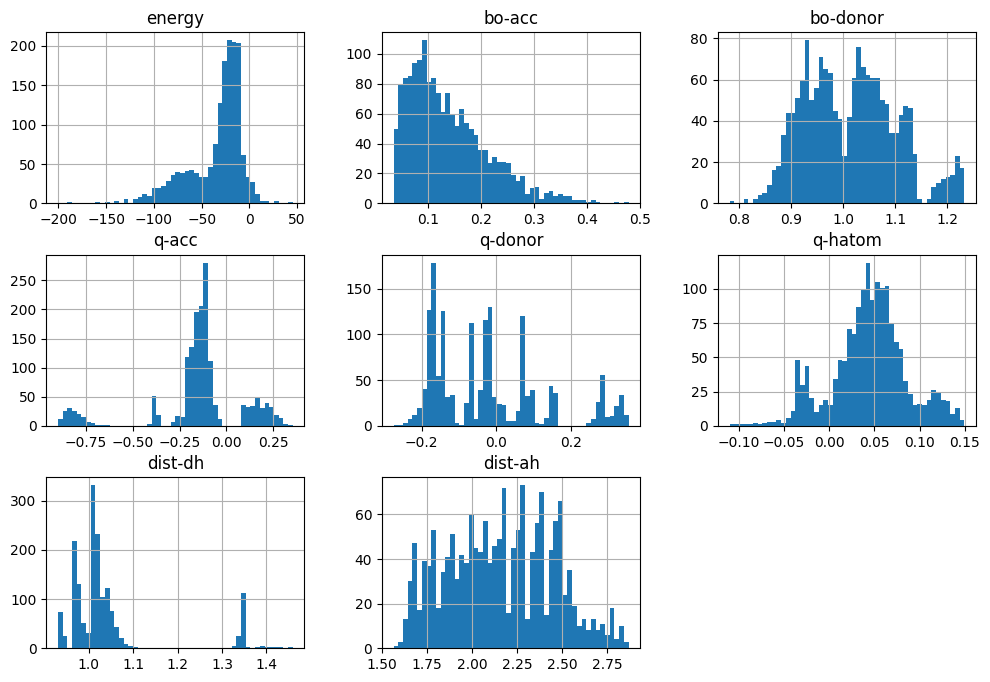

In [8]:
import matplotlib.pyplot as plt

hb_data.hist(bins=50, figsize=(12, 8))
plt.show()

The describe tool allows you to get a more detailed information on the numerical data:

In [6]:
hb_data.describe()

,energy,bo-acc,bo-donor,q-acc,q-donor,q-hatom,dist-dh,dist-ah
count,1638.000000,1638.000000,1638.000000,1638.000000,1638.000000,1638.000000,1638.000000,1638.000000
mean,-34.783759,0.138418,1.013692,-0.155270,-0.022809,0.044391,1.040342,2.156605
std,29.955517,0.075418,0.087824,0.249997,0.151830,0.041812,0.108458,0.290894
min,-200.597000,0.034200,0.781200,-0.898797,-0.275322,-0.110008,0.930018,1.564120
25%,-48.226500,0.080125,0.942050,-0.186461,-0.159131,0.022605,0.978411,1.927490
50%,-24.801450,0.120600,1.015000,-0.130414,-0.036496,0.045868,1.013607,2.158575
75%,-14.991750,0.181000,1.073400,-0.090575,0.073683,0.067276,1.038072,2.383549
max,45.413900,0.478100,1.232500,0.353389,0.354334,0.149418,1.459200,2.868591


std is the standard deviation of the attribute. 
25%, 50% and 75% refers to the percentiles: It is the value below the given percentage of observations fall.